In [383]:
import pandas as pd
import numpy as np

In [384]:
train = pd.read_csv(###train.csv')
test = pd.read_csv(###test.csv')

In [385]:
# created a dataframe to hold passenger ID and eventually our submission 
Submission = pd.DataFrame()
Submission['PassengerId'] = test['PassengerId']

In [386]:
# resetting the index to the passengerid 
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [387]:
print(train.shape)
print(test.shape)
print(Submission.shape)

(891, 11)
(418, 10)
(418, 1)


In [388]:
# concat both dataframes for easier data manipulation
combined = pd.concat([train,test])

In [389]:
combined.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742


In [390]:
#like before we will extract Title
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
# and we can drop Name and while we are at, Ticket
combined.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [391]:
combined.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
1,22.0,NaN,S,7.2500,0,3,male,1,0.0,Mr
2,38.0,C85,C,71.2833,0,1,female,1,1.0,Mrs
3,26.0,NaN,S,7.9250,0,3,female,0,1.0,Miss
4,35.0,C123,S,53.1000,0,1,female,1,1.0,Mrs
5,35.0,NaN,S,8.0500,0,3,male,0,0.0,Mr


In [392]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Title       1309 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


In [393]:
#we can now make Sex, Title, and Embarked categorical but we need to ensure no null values
print(np.count_nonzero(combined.Embarked.isnull()))
print(np.count_nonzero(combined.Sex.isnull()))
print(np.count_nonzero(combined.Title.isnull()))

2
0
0


In [394]:
#we have 2 missing embarked, We will fill with the most majority
combined.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [395]:
# S it is then 
combined.Embarked.fillna(value='S', inplace=True)

In [396]:
# check our counts
combined.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [397]:
# now we make Sex, Title, and Embarked categorical
combined.Sex = combined.Sex.astype('category')
combined.Title = combined.Title.astype('category')
combined.Embarked = combined.Embarked.astype('category')

In [398]:
# now we have stored a dictionary with integer refernces for these feature objects
combined.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
1,22.0,NaN,S,7.2500,0,3,male,1,0.0,Mr
2,38.0,C85,C,71.2833,0,1,female,1,1.0,Mrs
3,26.0,NaN,S,7.9250,0,3,female,0,1.0,Miss
4,35.0,C123,S,53.1000,0,1,female,1,1.0,Mrs
5,35.0,NaN,S,8.0500,0,3,male,0,0.0,Mr


In [399]:
#notice the head call above the categorical features still appear to be strings when in fact they are integers
combined.dtypes

Age          float64
Cabin         object
Embarked    category
Fare         float64
Parch          int64
Pclass         int64
Sex         category
SibSp          int64
Survived     float64
Title       category
dtype: object

In [400]:
combined.Title.cat.codes.head(3)

PassengerId
1    12
2    13
3     9
dtype: int8

In [401]:
# now we are left with Age and Cabin.  Lets start with Cabin
print(np.count_nonzero(combined.Cabin.isnull()))

1014


In [402]:
# we have 1014 missing values of a possible 1309. It may not be worth keeping this one but lets keep the letter
# replace NaN with U and make categorical
combined['Cabin'] = combined.Cabin.fillna('U')
combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
combined['Cabin'] = combined.Cabin.astype('category')

In [403]:
combined.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
1,22.0,U,S,7.2500,0,3,male,1,0.0,Mr
2,38.0,C,C,71.2833,0,1,female,1,1.0,Mrs
3,26.0,U,S,7.9250,0,3,female,0,1.0,Miss
4,35.0,C,S,53.1000,0,1,female,1,1.0,Mrs
5,35.0,U,S,8.0500,0,3,male,0,0.0,Mr


In [404]:
combined.dtypes

Age          float64
Cabin       category
Embarked    category
Fare         float64
Parch          int64
Pclass         int64
Sex         category
SibSp          int64
Survived     float64
Title       category
dtype: object

In [405]:
# all of our features are numeric now but we have missing values from Age, and 1 from Fare
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Age         1046 non-null float64
Cabin       1309 non-null category
Embarked    1309 non-null category
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null category
SibSp       1309 non-null int64
Survived    891 non-null float64
Title       1309 non-null category
dtypes: category(4), float64(3), int64(3)
memory usage: 78.0 KB


In [406]:
# lets take a peak at Fare quick
combined[combined.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
1044,60.5,U,S,NaN,0,3,male,0,NaN,Mr


In [407]:
# the 1 missing Fare is a 60 year old single male with no kids in 3rd class, lets just fill with mean from 3rd class
np.mean(combined[combined.Pclass==3])

Age         24.816367
Fare        13.302889
Parch        0.400564
Pclass       3.000000
SibSp        0.568406
Survived     0.242363
dtype: float64

In [408]:
# looks like the average Fare for 3rd class is 13.3 so lets go with it
combined.Fare.fillna(value=13.3, inplace=True)

In [409]:
# lets see if that worked 
np.count_nonzero(combined.Fare.isnull())

0

In [410]:
# now lets clean up Age, first lets take a look
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [411]:
# there doesnt appear to be any major outliers on age but we do have some missing values
np.count_nonzero(combined.Age.isnull())

263

In [412]:
# we have 263 missing values.  If you recall, last time we imputed the missing ages with a mean - 29.88 years old
# we are going to take a different approach this time around becasue age will play a role in feature development
# because of the importance, lets build a linear model to fill the NaN
Age_test = combined[combined.Age.isnull()]
Age_train = combined[combined.Age.notna()]

In [413]:
Age_test.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
6,NaN,U,Q,8.4583,0,3,male,0,0.0,Mr
18,NaN,U,S,13.0000,0,2,male,0,1.0,Mr
20,NaN,U,C,7.2250,0,3,female,0,1.0,Mrs
27,NaN,U,C,7.2250,0,3,male,0,0.0,Mr
29,NaN,U,Q,7.8792,0,3,female,0,1.0,Miss


In [414]:
Age_train.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
1,22.0,U,S,7.2500,0,3,male,1,0.0,Mr
2,38.0,C,C,71.2833,0,1,female,1,1.0,Mrs
3,26.0,U,S,7.9250,0,3,female,0,1.0,Miss
4,35.0,C,S,53.1000,0,1,female,1,1.0,Mrs
5,35.0,U,S,8.0500,0,3,male,0,0.0,Mr


In [415]:
# we are going to have a lot of NaN in Survived so lets drop those form both, and we need to drop Age from test
Age_test = Age_test.drop(['Survived','Age'], axis=1)
Age_train_y = Age_train.Age
Age_train = Age_train.drop(['Survived','Age'], axis=1)

In [416]:
Age_test.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title
PassengerId,,,,,,,,
6,U,Q,8.4583,0,3,male,0,Mr
18,U,S,13.0000,0,2,male,0,Mr
20,U,C,7.2250,0,3,female,0,Mrs


In [417]:
Age_train.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title
PassengerId,,,,,,,,
1,U,S,7.2500,0,3,male,1,Mr
2,C,C,71.2833,0,1,female,1,Mrs
3,U,S,7.9250,0,3,female,0,Miss


In [418]:
Age_train_y.head(3)

PassengerId
1    22.0
2    38.0
3    26.0
Name: Age, dtype: float64

In [419]:
#we need to do a quick conversion of the category values
cat_columns = Age_test.select_dtypes(['category']).columns

Age_test[cat_columns] = Age_test[cat_columns].apply(lambda x: x.cat.codes)
Age_train[cat_columns] = Age_train[cat_columns].apply(lambda x: x.cat.codes)


In [420]:
Age_test.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title
PassengerId,,,,,,,,
6,8,1,8.4583,0,3,1,0,12
18,8,2,13.0000,0,2,1,0,12
20,8,0,7.2250,0,3,0,0,13


In [421]:
Age_train.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title
PassengerId,,,,,,,,
1,8,2,7.2500,0,3,1,1,12
2,2,0,71.2833,0,1,0,1,13
3,8,2,7.9250,0,3,0,0,9


In [422]:
# we are not going to get too fancy here, just a simple regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Age_train,Age_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [423]:
# let's make some predicitons and create our new missing Ages
Age_test['Age'] = reg.predict(Age_test)
Age_test.Age.head(10)

PassengerId
6     27.727952
18    34.564222
20    27.989594
27    27.227061
29    20.144631
30    28.225262
32    40.774391
33    20.144374
37    27.227070
43    27.228399
Name: Age, dtype: float64

In [424]:
# we can go ahead and concatinate this with the train set and then with the combined dataframe
Age_train = pd.concat([Age_train,Age_train_y], axis=1)

In [425]:
combined = pd.concat([Age_train,Age_test], axis=0)

In [426]:
combined.sort_index(inplace=True)
combined.head(10)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Age
PassengerId,,,,,,,,,
1,8,2,7.2500,0,3,1,1,12,22.000000
2,2,0,71.2833,0,1,0,1,13,38.000000
3,8,2,7.9250,0,3,0,0,9,26.000000
4,2,2,53.1000,0,1,0,1,13,35.000000
5,8,2,8.0500,0,3,1,0,12,35.000000
6,8,1,8.4583,0,3,1,0,12,27.727952
7,4,2,51.8625,0,1,1,0,12,54.000000
8,8,2,21.0750,1,3,1,3,8,2.000000
9,8,2,11.1333,2,3,0,0,13,27.000000


In [427]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Cabin       1309 non-null int8
Embarked    1309 non-null int8
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int8
SibSp       1309 non-null int64
Title       1309 non-null int8
Age         1309 non-null float64
dtypes: float64(2), int64(3), int8(4)
memory usage: 66.5 KB


### Feature creation or engineering time
1. Make a column for famliy size
2. Make a column for isDad and isMom
3. Make a column for Affluent
4. Make column for isSingleParent

That's all I can think of for now

In [428]:
combined['Family_Size'] = combined.Parch + combined.SibSp
combined['isDad']=np.where((combined['Age']>20)&(combined['Parch']>0)&(combined['Sex']==1),1,0)
combined['isMom']=np.where((combined['Age']>20)&(combined['Parch']>0)&(combined['Sex']==0),1,0)
combined['SingleParent']=np.where((combined['Age']>20)&(combined['Parch']>0)&(combined['SibSp']==0),1,0)

In [429]:
# for is Afluent I want to consider Fare or Class
combined.Fare.describe()

count    1309.000000
mean       33.280204
std        51.741831
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

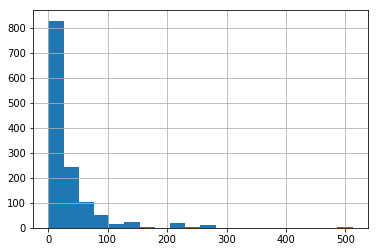

In [430]:
%matplotlib inline
combined.Fare.hist(bins=20)

In [431]:
# it appears that anything equal or greater to 50 assumes they are relatively well off
combined['Affluent']=np.where((combined['Pclass']==1)|(combined['Fare']>=50),1,0)

In [432]:
combined.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Age,Family_Size,isDad,isMom,SingleParent,Affluent
PassengerId,,,,,,,,,,,,,,
1,8,2,7.2500,0,3,1,1,12,22.0,1,0,0,0,0
2,2,0,71.2833,0,1,0,1,13,38.0,1,0,0,0,1
3,8,2,7.9250,0,3,0,0,9,26.0,0,0,0,0,0


In [433]:
# alright, lets split the data back into train and test and give it a try
y = train.Survived
X = combined.iloc[:891]
X_Test = combined.iloc[891:]

In [434]:
y.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

In [435]:
X.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Age,Family_Size,isDad,isMom,SingleParent,Affluent
PassengerId,,,,,,,,,,,,,,
1,8,2,7.2500,0,3,1,1,12,22.0,1,0,0,0,0
2,2,0,71.2833,0,1,0,1,13,38.0,1,0,0,0,1
3,8,2,7.9250,0,3,0,0,9,26.0,0,0,0,0,0


In [436]:
X_Test.head(3)

,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Age,Family_Size,isDad,isMom,SingleParent,Affluent
PassengerId,,,,,,,,,,,,,,
892,8,1,7.8292,0,3,1,0,12,34.5,0,0,0,0,0
893,8,2,7.0000,0,3,0,1,13,47.0,1,0,0,0,0
894,8,1,9.6875,0,2,1,0,12,62.0,0,0,0,0,0


In [437]:
print(X.shape)
print(X_Test.shape)
print(y.shape)

(891, 14)
(418, 14)
(891,)


In [460]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [476]:
# instantiate estimators and transformers
selector = SelectKBest(k=14)
scaler = MinMaxScaler()
clf = LinearSVC()

In [477]:
pipe = Pipeline(steps=[('selector', selector), ('scaler',scaler), ('clf', clf)])

In [478]:
parameters = {'clf__C':[.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}

In [479]:
grid = GridSearchCV(pipe,parameters)

In [480]:
grid.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=14, score_func=<function f_classif at 0x000001F53EC9DD08>)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [481]:
grid.grid_scores_

[mean: 0.79461, std: 0.01924, params: {'clf__C': 0.01},
 mean: 0.79012, std: 0.01356, params: {'clf__C': 0.02},
 mean: 0.78451, std: 0.01100, params: {'clf__C': 0.03},
 mean: 0.78563, std: 0.01240, params: {'clf__C': 0.04},
 mean: 0.78563, std: 0.01240, params: {'clf__C': 0.05},
 mean: 0.78563, std: 0.01240, params: {'clf__C': 0.06},
 mean: 0.78676, std: 0.01240, params: {'clf__C': 0.07},
 mean: 0.79012, std: 0.00965, params: {'clf__C': 0.08},
 mean: 0.79012, std: 0.00884, params: {'clf__C': 0.09},
 mean: 0.78900, std: 0.00840, params: {'clf__C': 0.1},
 mean: 0.79461, std: 0.01198, params: {'clf__C': 0.2},
 mean: 0.79349, std: 0.01145, params: {'clf__C': 0.3},
 mean: 0.79574, std: 0.01041, params: {'clf__C': 0.4},
 mean: 0.79686, std: 0.00884, params: {'clf__C': 0.5},
 mean: 0.79237, std: 0.00884, params: {'clf__C': 0.6},
 mean: 0.79349, std: 0.01041, params: {'clf__C': 0.7},
 mean: 0.79237, std: 0.01111, params: {'clf__C': 0.8},
 mean: 0.79237, std: 0.01145, params: {'clf__C': 0.9},
 

In [482]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=14, score_func=<function f_classif at 0x000001F53EC9DD08>)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [483]:
Submission['Survived']= grid.best_estimator_.predict(X_Test)
Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [484]:
Submission.to_csv('C:/users/micha/Desktop/Bemidji Meetup/titanic/submission.csv', index=False, header=True)

It seems like we are hitting a ceiling around 80% accuracy, so I will introduct T=pot quick.

Consider TPOT your Data Science Assistant. TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for your data.

In [486]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

In [488]:
pipeline_optimizer = TPOTClassifier(verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

C:\Users\micha\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Generation 1 - Current best internal CV score: 0.8357007990511137


Generation 2 - Current best internal CV score: 0.8357007990511137


Generation 3 - Current best internal CV score: 0.8357007990511137


Generation 4 - Current best internal CV score: 0.8357007990511137


Generation 5 - Current best internal CV score: 0.8370301758974218


Generation 6 - Current best internal CV score: 0.8370994004497151


Generation 7 - Current best internal CV score: 0.8427332032666165


Generation 8 - Current best internal CV score: 0.8427332032666165


Generation 9 - Current best internal CV score: 0.8455107074525714


Generation 10 - Current best internal CV score: 0.8455107074525714


Generation 11 - Current best internal CV score: 0.8469290074624206


Generation 12 - Current best internal CV score: 0.8469290074624206


Generation 13 - Current best internal CV score: 0.8469290074624206


Generation 14 - Current best internal CV score: 0.8469290074624206


Generation 15 - Current best internal CV score: 0.8483374581666461


Generation 16 - Current best internal CV score: 0.8483374581666461


Generation 17 - Current best internal CV score: 0.8483374581666461


Generation 18 - Current best internal CV score: 0.8483374581666461


Generation 19 - Current best internal CV score: 0.8483374581666461


Generation 20 - Current best internal CV score: 0.8483374581666461


Generation 21 - Current best internal CV score: 0.8511346609638488


Generation 22 - Current best internal CV score: 0.8511346609638488


Generation 23 - Current best internal CV score: 0.8511346609638488


Generation 24 - Current best internal CV score: 0.8511346609638488


Generation 25 - Current best internal CV score: 0.8511644882936462


Generation 26 - Current best internal CV score: 0.8511644882936462


Generation 27 - Current best internal CV score: 0.8511644882936462


Generation 28 - Current best internal CV score: 0.8511644882936462


Generation 29 - Current best internal CV score: 0.8511644882936462


Generation 30 - Current best internal CV score: 0.8511644882936462


Generation 31 - Current best internal CV score: 0.8511644882936462


Generation 32 - Current best internal CV score: 0.8511644882936462


Generation 33 - Current best internal CV score: 0.8511644882936462


Generation 34 - Current best internal CV score: 0.8511644882936462


Generation 35 - Current best internal CV score: 0.8511644882936462


Generation 36 - Current best internal CV score: 0.8511644882936462


Generation 37 - Current best internal CV score: 0.8511644882936462


Generation 38 - Current best internal CV score: 0.8511644882936462


Generation 39 - Current best internal CV score: 0.8511644882936462


Generation 40 - Current best internal CV score: 0.8511644882936462


Generation 41 - Current best internal CV score: 0.8511644882936462


Generation 42 - Current best internal CV score: 0.8511644882936462


Generation 43 - Current best internal CV score: 0.8511644882936462


Generation 44 - Current best internal CV score: 0.8511644882936462


Generation 45 - Current best internal CV score: 0.8511644882936462


Generation 46 - Current best internal CV score: 0.8511644882936462


Generation 47 - Current best internal CV score: 0.8511644882936462


Generation 48 - Current best internal CV score: 0.8511644882936462


Generation 49 - Current best internal CV score: 0.8511644882936462


Generation 50 - Current best internal CV score: 0.8511644882936462


Generation 51 - Current best internal CV score: 0.8511644882936462


Generation 52 - Current best internal CV score: 0.8511644882936462


Generation 53 - Current best internal CV score: 0.8525532403866236


Generation 54 - Current best internal CV score: 0.8525532403866236


Generation 55 - Current best internal CV score: 0.8525532403866236


Generation 56 - Current best internal CV score: 0.8525532403866236


Generation 57 - Current best internal CV score: 0.8525532403866236


Generation 58 - Current best internal CV score: 0.8525532403866236


Generation 59 - Current best internal CV score: 0.8525532403866236


Generation 60 - Current best internal CV score: 0.8525532403866236


Generation 61 - Current best internal CV score: 0.8525532403866236


Generation 62 - Current best internal CV score: 0.8525532403866236


Generation 63 - Current best internal CV score: 0.8525532403866236


Generation 64 - Current best internal CV score: 0.8525532403866236


Generation 65 - Current best internal CV score: 0.8553306048661158


Generation 66 - Current best internal CV score: 0.8553306048661158


Generation 67 - Current best internal CV score: 0.8553306048661158


Generation 68 - Current best internal CV score: 0.8553306048661158


Generation 69 - Current best internal CV score: 0.8553306048661158


Generation 70 - Current best internal CV score: 0.8553306048661158


Generation 71 - Current best internal CV score: 0.8553306048661158


Generation 72 - Current best internal CV score: 0.8553306048661158


Generation 73 - Current best internal CV score: 0.8553306048661158


Generation 74 - Current best internal CV score: 0.8553306048661158


Generation 75 - Current best internal CV score: 0.8553306048661158


Generation 76 - Current best internal CV score: 0.8553306048661158


Generation 77 - Current best internal CV score: 0.8553306048661158


Generation 78 - Current best internal CV score: 0.8553306048661158


Generation 79 - Current best internal CV score: 0.8553306048661158


Generation 80 - Current best internal CV score: 0.8553306048661158


Generation 81 - Current best internal CV score: 0.8553306048661158


Generation 82 - Current best internal CV score: 0.8553306048661158


Generation 83 - Current best internal CV score: 0.8553306048661158


Generation 84 - Current best internal CV score: 0.8553306048661158


Generation 85 - Current best internal CV score: 0.8553306048661158


Generation 86 - Current best internal CV score: 0.8553306048661158


Generation 87 - Current best internal CV score: 0.8553306048661158


Generation 88 - Current best internal CV score: 0.8553306048661158


Generation 89 - Current best internal CV score: 0.8553306048661158


Generation 90 - Current best internal CV score: 0.8553306048661158


Generation 91 - Current best internal CV score: 0.8553306048661158


Generation 92 - Current best internal CV score: 0.8553306048661158


Generation 93 - Current best internal CV score: 0.8553306048661158


Generation 94 - Current best internal CV score: 0.8553306048661158


Generation 95 - Current best internal CV score: 0.8553306048661158


Generation 96 - Current best internal CV score: 0.8553306048661158


Generation 97 - Current best internal CV score: 0.8553306048661158


Generation 98 - Current best internal CV score: 0.8553306048661158


Generation 99 - Current best internal CV score: 0.8553306048661158


Generation 100 - Current best internal CV score: 0.8553306048661158



Best pipeline: RandomForestClassifier(GradientBoostingClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=3, max_features=0.8, min_samples_leaf=12, min_samples_split=14, n_estimators=100, subsample=0.35), learning_rate=0.001, max_depth=6, max_features=0.1, min_samples_leaf=7, min_samples_split=6, n_estimators=100, subsample=0.1), bootstrap=True, criterion=gini, max_features=0.55, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
0.826815642458


True

In [489]:
Submission['Survived']=pipeline_optimizer.predict(X_Test)
Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [490]:
Submission.to_csv(###submission.csv', index=False, header=True)